In [33]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [34]:
# reading the csv file
data_path = '/home/james/Desktop/KPMG virtual internship/data/Transactions.csv'
data = pd.read_csv(data_path, parse_dates=['transaction_date'])

In [35]:
#printing the first five rows of the data
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [36]:
data.shape

(20000, 13)

In [37]:
data.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [38]:
pp.ProfileReport(data)

# EDA

### Missing data

In [39]:
data.dropna(subset=['brand'], axis=0, inplace=True)

In [40]:
data.dropna(subset=['online_order', 'product_class','product_first_sold_date','product_line', 'product_size', 
                    'standard_cost'],axis=0, inplace=True)

In [41]:
data.shape

(19445, 13)

In [42]:
# dealing with the transaction date
data = data.assign(year = data.transaction_date.dt.year,
                  month = data.transaction_date.dt.month,
                  day = data.transaction_date.dt.day)

In [43]:
data.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'year', 'month', 'day'],
      dtype='object')

In [44]:
data.drop('transaction_date', axis=1, inplace=True)

In [45]:
data.columns

Index(['transaction_id', 'product_id', 'customer_id', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'year', 'month', 'day'],
      dtype='object')

In [46]:
data.head()

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,year,month,day
0,1,2,2950,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,2,25
1,2,3,3120,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,5,21
2,3,37,402,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017,10,16
3,4,88,3135,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017,8,31
4,5,78,787,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017,10,1


In [47]:
data.shape

(19445, 15)

### Outliers

#### IQR

In [48]:
# using iqr to check and remove an outliers in the dataset
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3-Q1

In [49]:
print(IQR)

transaction_id             10021.00
product_id                    54.00
customer_id                 1758.00
online_order                   1.00
list_price                  1060.03
standard_cost                579.96
product_first_sold_date     5005.00
year                           0.00
month                          6.00
day                           15.00
dtype: float64


In [50]:
# using the IQR values to detect the outliers
const = 1.5 * IQR

In [51]:
# any value that is less than the first quantile and greater than the third quantile is an outlier
outliers1 = data < Q1 -const
outliers2 = data > Q3 + const

In [52]:
print(outliers1)

       brand  customer_id    day  list_price  month  online_order  \
0      False        False  False       False  False         False   
1      False        False  False       False  False         False   
2      False        False  False       False  False         False   
3      False        False  False       False  False         False   
4      False        False  False       False  False         False   
...      ...          ...    ...         ...    ...           ...   
19995  False        False  False       False  False         False   
19996  False        False  False       False  False         False   
19997  False        False  False       False  False         False   
19998  False        False  False       False  False         False   
19999  False        False  False       False  False         False   

       order_status  product_class  product_first_sold_date  product_id  \
0             False          False                    False       False   
1             False  

In [53]:
print(outliers2)

       brand  customer_id    day  list_price  month  online_order  \
0      False        False  False       False  False         False   
1      False        False  False       False  False         False   
2      False        False  False       False  False         False   
3      False        False  False       False  False         False   
4      False        False  False       False  False         False   
...      ...          ...    ...         ...    ...           ...   
19995  False        False  False       False  False         False   
19996  False        False  False       False  False         False   
19997  False        False  False       False  False         False   
19998  False        False  False       False  False         False   
19999  False        False  False       False  False         False   

       order_status  product_class  product_first_sold_date  product_id  \
0             False          False                    False       False   
1             False  

In [54]:
# removing the outliers
data = data[~(outliers1).any(axis=1)]

In [55]:
data = data[~(outliers2).any(axis=1)]

In [56]:
data.shape

(19256, 15)

# Univariate Analysis

In [57]:
data.columns

Index(['transaction_id', 'product_id', 'customer_id', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'year', 'month', 'day'],
      dtype='object')

## Online_Order

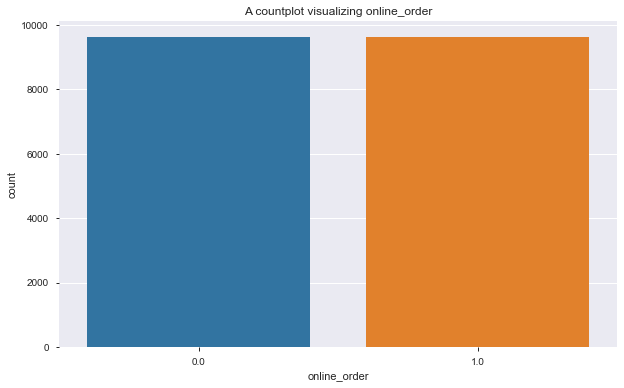

In [60]:
plt.figure(figsize=(10,6))
plt.title('A countplot visualizing online_order')
sns.countplot(x='online_order', data=data)
plt.show()

## Brand


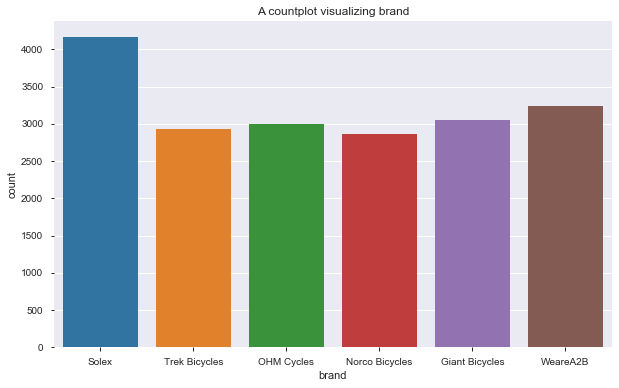

In [61]:
plt.figure(figsize=(10,6))
plt.title('A countplot visualizing brand')
sns.countplot(x='brand', data=data)
plt.show()

### Findings
    - The most preferred brand is solex

## Product Line

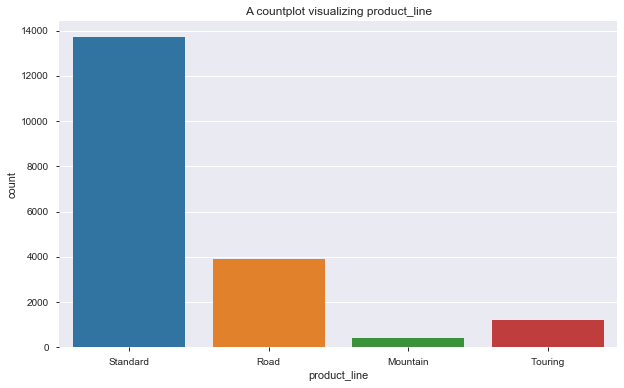

In [62]:
plt.figure(figsize=(10,6))
plt.title('A countplot visualizing product_line')
sns.countplot(x='product_line', data=data)
plt.show()

### Findings
    - standard is the most preferred product line

## Product size

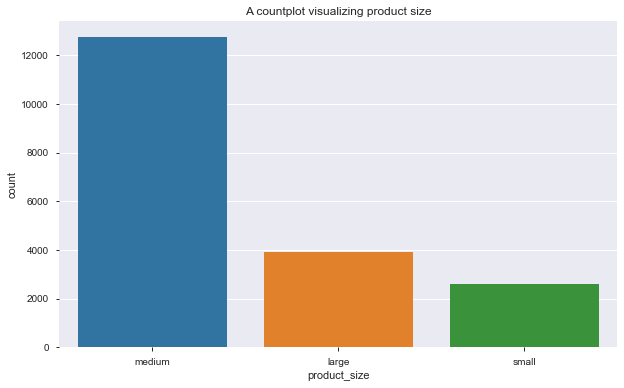

In [64]:
plt.figure(figsize=(10,6))
plt.title('A countplot visualizing product size')
sns.countplot(x= 'product_size', data=data)
plt.show()

### Findings
    - Medium size is the most preferred size

## Product class

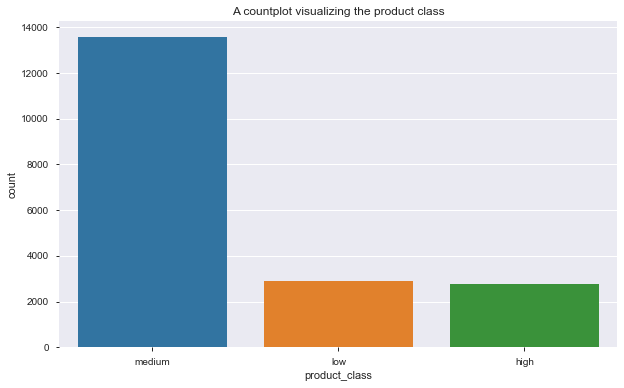

In [65]:
plt.figure(figsize=(10,6))
plt.title('A countplot visualizing the product class')
sns.countplot(x='product_class', data=data)
plt.show()

### Findings
    - medium is the most preferred product class

## Order status

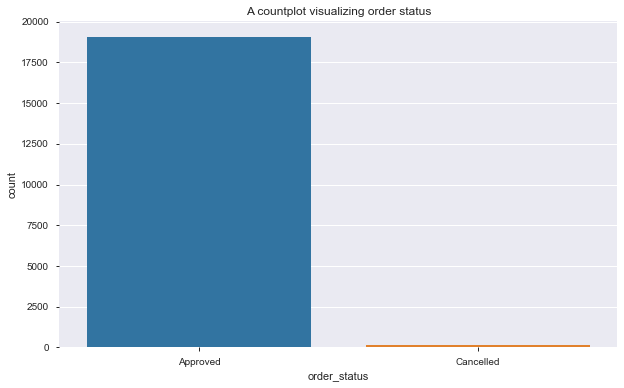

In [66]:
plt.figure(figsize=(10,6))
plt.title('A countplot visualizing order status')
sns.countplot(x='order_status', data=data)
plt.show()

### Findings
    - Most of the orders were approved